In [9]:
# PART 1.5: Resume Download for Missing Ecuadorian Products (English Version)

import time
import random

# 1. Check what we already have to avoid duplicates
if csv_path.exists():
    df_existing = pd.read_csv(csv_path)
    existing_labels = df_existing['labels'].unique()
else:
    existing_labels = []

print(f"✅ Current Inventory: {existing_labels}")
print("🔧 Checking for missing products...")

# Ecuadorian Product Dictionary 🇪🇨
# Keys match your existing folders. Values are the search queries.
PRODUCTS = {
    'leche_vita':   'leche vita carton ecuador',
    'leche_nutri':  'leche nutri litro ecuador',
    'atun_real':    'atun real lata ecuador',
    'guitig':       'guitig agua mineral botella',
    'tropical':     'gaseosa tropical botella ecuador',
    'tortolines':   'chifles tortolines inalecsa',
    'fideos_sumesa':'fideos sumesa paquete',
    'avena_quaker': 'avena quaker bolsa azul ecuador',
    'manzana':      'manzana fruta roja',
    'platano':      'guineo platano ecuador'
}

# 2. Slow Rescue Loop
for label, search_query in PRODUCTS.items():
    
    # Skip if already downloaded
    if label in existing_labels:
        print(f"⏩ Skipping {label} (Already exists)")
        continue
    
    print(f"\n📦 RECOVERING: {label.upper()}")
    dest_folder = img_path / label
    dest_folder.mkdir(exist_ok=True)
    
    try:
        with DDGS() as ddgs:
            # Downloading 6 images per missing item
            results = list(ddgs.images(search_query, max_results=6))
            urls = [r['image'] for r in results]
        
        for i, url in enumerate(urls):
            try:
                filename = f"{label}_{i}.jpg"
                rel_path = f"{label}/{filename}" 
                dest = dest_folder / filename
                
                download_url(url, dest, show_progress=False)
                
                with open(csv_path, 'a') as f: 
                    f.write(f"{rel_path},{label}\n")
                print(f"      ✅ Recovered: {rel_path}")
            except: pass
        
        # LONG PAUSE (20 seconds) to prevent 403 Errors
        print("      💤 Safety pause (20s)...")
        time.sleep(20)
        
    except Exception as e:
        print(f"      ❌ Error on {label}: {e}")
        print("      ⚠️ Waiting 60 seconds before next attempt...")
        time.sleep(60)

print("\n✨ Rescue mission complete. Run the visualization cell below.")

✅ Current Inventory: ['leche_vita' 'leche_nutri' 'atun_real' 'tropical' 'tortolines'
 'fideos_sumesa' 'avena_quaker' 'manzana']
🔧 Checking for missing products...
⏩ Skipping leche_vita (Already exists)
⏩ Skipping leche_nutri (Already exists)
⏩ Skipping atun_real (Already exists)

📦 RECOVERING: GUITIG


C:\Users\alexc\AppData\Local\Temp\ipykernel_6252\3070472111.py:44: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


      ✅ Recovered: guitig/guitig_0.jpg
      ✅ Recovered: guitig/guitig_1.jpg
      ✅ Recovered: guitig/guitig_2.jpg
      ✅ Recovered: guitig/guitig_4.jpg
      ✅ Recovered: guitig/guitig_5.jpg
      💤 Safety pause (20s)...
⏩ Skipping tropical (Already exists)
⏩ Skipping tortolines (Already exists)
⏩ Skipping fideos_sumesa (Already exists)
⏩ Skipping avena_quaker (Already exists)
⏩ Skipping manzana (Already exists)

📦 RECOVERING: PLATANO


C:\Users\alexc\AppData\Local\Temp\ipykernel_6252\3070472111.py:44: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


      ✅ Recovered: platano/platano_0.jpg
      ✅ Recovered: platano/platano_1.jpg
      ✅ Recovered: platano/platano_2.jpg
      ✅ Recovered: platano/platano_3.jpg
      ✅ Recovered: platano/platano_4.jpg
      ✅ Recovered: platano/platano_5.jpg
      💤 Safety pause (20s)...

✨ Rescue mission complete. Run the visualization cell below.


📊 Total Inventory: 50 images


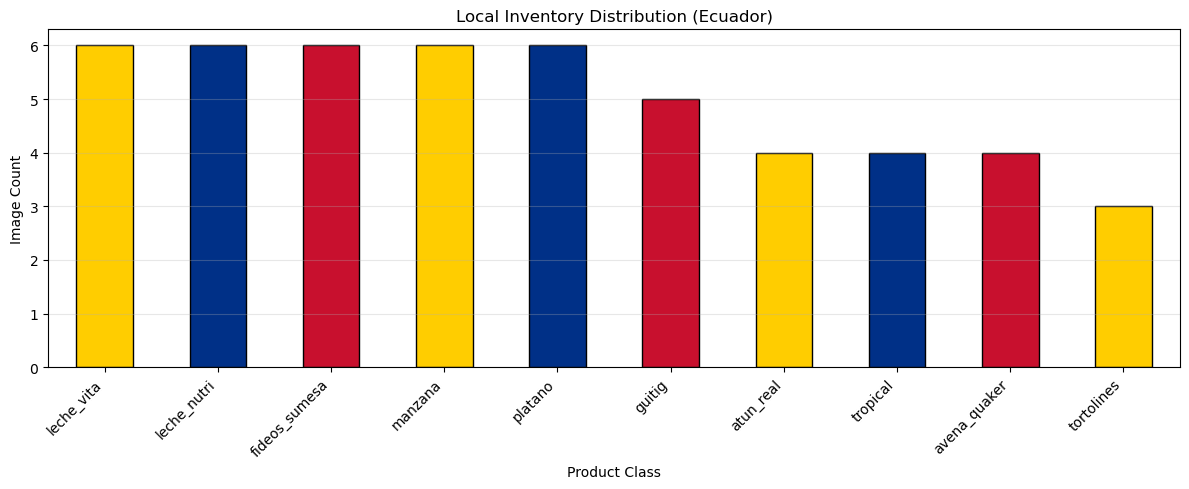


👀 Dataset Samples (AI Input):


c:\Users\alexc\anaconda3\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)
c:\Users\alexc\anaconda3\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)
c:\Users\alexc\anaconda3\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)
c:\Users\alexc\anaconda3\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False 

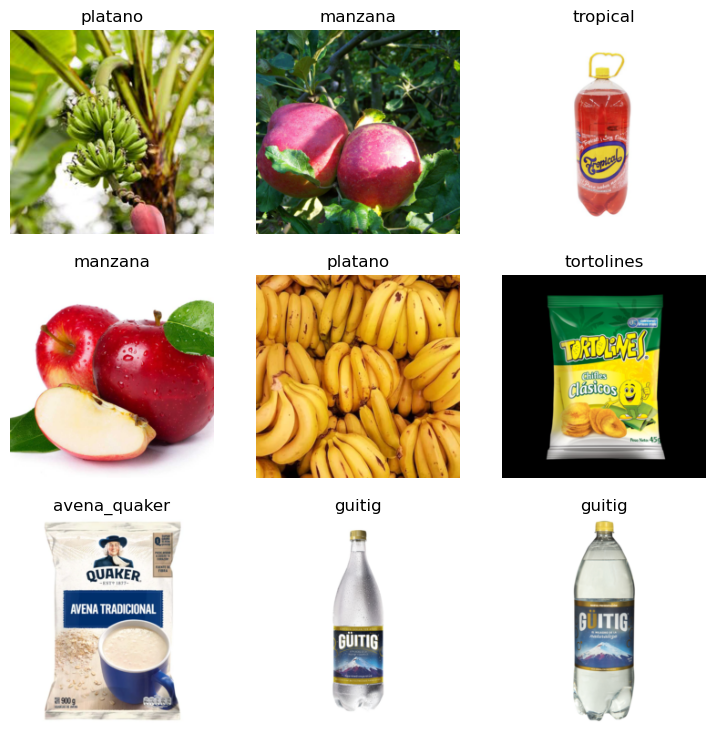

In [10]:
# PART 2: Final Visualization (Ecuadorian Inventory)

# Reload Data
df_full = pd.read_csv(csv_path)
print(f"📊 Total Inventory: {len(df_full)} images")

# 1. Bar Chart
if 'labels' in df_full.columns:
    plt.figure(figsize=(12, 5))
    colors = ['#ffcd00', '#003087', '#c8102e'] # Ecuador Flag Colors 🇪🇨
    
    counts = df_full['labels'].value_counts()
    counts.plot(kind='bar', color=colors, edgecolor='black')
    
    plt.title('Local Inventory Distribution (Ecuador)')
    plt.xlabel('Product Class')
    plt.ylabel('Image Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2. Image Collage
print("\n👀 Dataset Samples (AI Input):")

# Helper functions for FastAI
def get_x(r): return img_path / r['fname']
def get_y(r): return r['labels'].split(' ')

try:
    dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                       get_x=get_x, get_y=get_y,
                       item_tfms=Resize(224)) # Resize to 224x224
    
    dls = dblock.dataloaders(df_full, bs=9)
    dls.show_batch(max_n=9)
except Exception as e:
    print(f"Note: If categories are missing images, FastAI might skip them. Error: {e}")

📂 Leyendo datos desde: C:\Users\alexc\Desktop\SmartInventory\data\images

📋 RESUMEN ESTADÍSTICO:
Total de Clases: 9
Total de Imágenes: 414
------------------------------
        Clase  Cantidad
 avena_quaker        74
    atun_real        59
       guitig        53
  leche_nutri        52
fideos_sumesa        45
     gaseosas        37
       snacks        35
      manzana        31
       banana        28


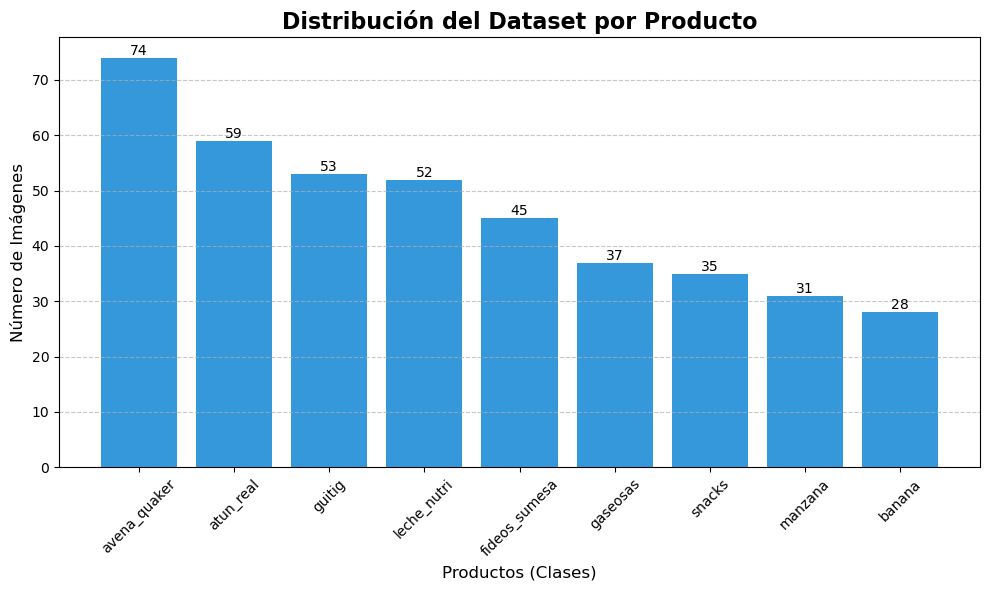


📸 EJEMPLOS VISUALES DEL DATASET:


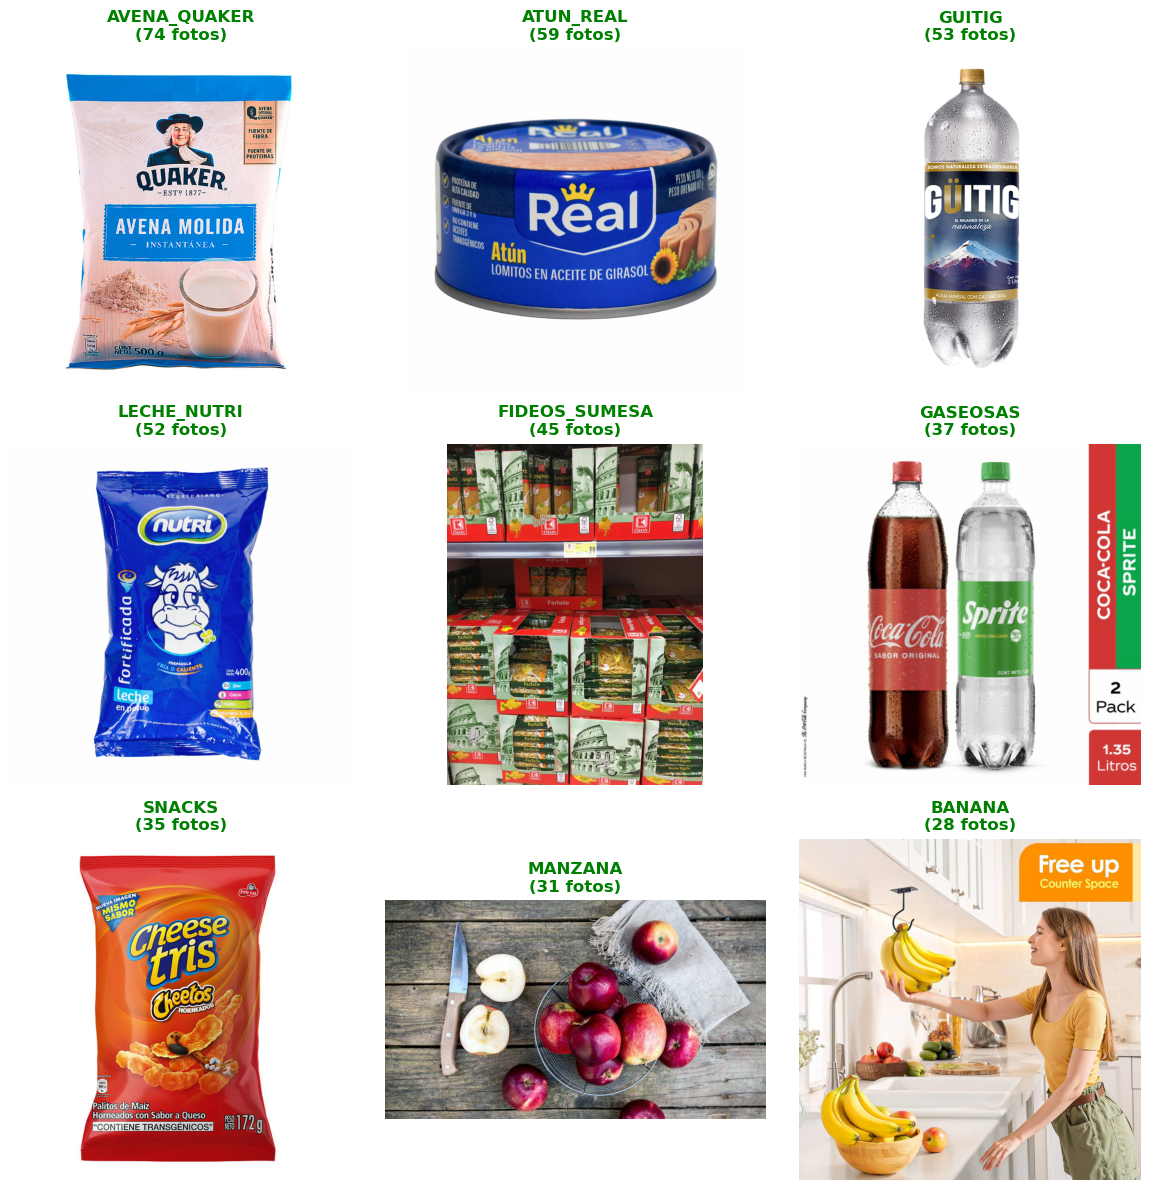

In [1]:
# 📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA) - SMART NUTRITION AI
# Autor: [Tu Nombre]
# Descripción: Análisis estadístico y visual del dataset de productos.

import matplotlib.pyplot as plt
import pandas as pd
import pathlib
from PIL import Image
import os

# --- 1. CONFIGURACIÓN DE RUTAS ---
# Ajustamos la ruta para salir de 'notebooks' y entrar a 'data'
BASE_DIR = pathlib.Path('../data/images')
CSV_PATH = pathlib.Path('../data/labels.csv')

print(f"📂 Leyendo datos desde: {BASE_DIR.resolve()}")

# --- 2. ESTADÍSTICAS DEL DATASET ---
data = []

# Opción A: Leer directo de las carpetas (Más confiable si el CSV no está actualizado)
for folder in BASE_DIR.iterdir():
    if folder.is_dir():
        count = len(list(folder.glob('*.*')))
        data.append({'Clase': folder.name, 'Cantidad': count})

df = pd.DataFrame(data)
df = df.sort_values(by='Cantidad', ascending=False)

print("\n📋 RESUMEN ESTADÍSTICO:")
print(f"Total de Clases: {len(df)}")
print(f"Total de Imágenes: {df['Cantidad'].sum()}")
print("-" * 30)
print(df.to_string(index=False))

# --- 3. GRÁFICO DE BARRAS (DISTRIBUCIÓN) ---
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Clase'], df['Cantidad'], color='#3498db')

# Estética del gráfico
plt.title('Distribución del Dataset por Producto', fontsize=16, fontweight='bold')
plt.xlabel('Productos (Clases)', fontsize=12)
plt.ylabel('Número de Imágenes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Poner los números encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# --- 4. MUESTREO VISUAL (EJEMPLOS) ---
print("\n📸 EJEMPLOS VISUALES DEL DATASET:")

# Configurar el grid (ej: 3x3)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

clases = df['Clase'].tolist()

for i, ax in enumerate(axes):
    if i < len(clases):
        clase = clases[i]
        # Tomar la primera imagen que encuentre de esa clase
        folder_path = BASE_DIR / clase
        images = list(folder_path.glob('*.*'))
        
        if images:
            img = Image.open(images[0])
            ax.imshow(img)
            ax.set_title(f"{clase.upper()}\n({len(images)} fotos)", color='green', fontweight='bold')
            ax.axis('off')
    else:
        ax.axis('off') # Apagar ejes sobrantes

plt.tight_layout()
plt.show()